## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading the CSV file

In [2]:
data=pd.read_csv('Comb_heart_data.csv')

## 1) EDA

## Checking first five rows.

In [3]:
data.head()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Checking for the last Five rows.

In [4]:
data.tail()

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
924,54,0,4,127,333,1,1,154,0,0,?,?,?,1
925,62,1,1,?,139,0,1,?,?,?,?,?,?,0
926,55,1,4,122,223,1,1,100,0,0,?,?,6,2
927,58,1,4,?,385,1,2,?,?,?,?,?,?,0
928,62,1,2,120,254,0,2,93,1,0,?,?,?,1


## Conclusion:- After Checking the last five rows we can say that, There are Some missing values exist in our dataset, so we need to take care of Preprocessing the data very carefully.

## Information of about dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    int64 
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          929 non-null    object
 4   Cholestrol       929 non-null    object
 5   Fast_bld_sugar   929 non-null    object
 6   Rest_Ecg         929 non-null    object
 7   Max_Rt           929 non-null    object
 8   Ex_Angina        929 non-null    object
 9   St_Depr          929 non-null    object
 10  Slope            929 non-null    object
 11  Colored_Vessels  929 non-null    object
 12  Thalassemia      929 non-null    object
 13  Target           929 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.7+ KB


## Statistical Information

In [6]:
data.describe(include='all')

,Age,Sex,ChestPain,Rest_bp,Cholestrol,Fast_bld_sugar,Rest_Ecg,Max_Rt,Ex_Angina,St_Depr,Slope,Colored_Vessels,Thalassemia,Target
count,929.000000,929.000000,929.000000,929,929,929,929,929,929,929,929,929,929,929.00000
unique,NaN,NaN,NaN,59,181,3,4,118,3,53,4,5,4,NaN
top,NaN,NaN,NaN,120,0,0,0,?,0,0,2,0,3,NaN
freq,NaN,NaN,NaN,103,172,684,467,54,528,280,394,354,355,NaN
mean,55.612487,0.773950,3.304629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.17761
std,8.994760,0.418497,0.917261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24555
min,29.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,50.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,57.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000
75%,62.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000


In [7]:
data.columns

Index(['Age', 'Sex', 'ChestPain', 'Rest_bp', 'Cholestrol', 'Fast_bld_sugar',
       'Rest_Ecg', 'Max_Rt', 'Ex_Angina', 'St_Depr', 'Slope',
       'Colored_Vessels', 'Thalassemia', 'Target'],
      dtype='object')

In [8]:
data.dtypes

Age                 int64
Sex                 int64
ChestPain           int64
Rest_bp            object
Cholestrol         object
Fast_bld_sugar     object
Rest_Ecg           object
Max_Rt             object
Ex_Angina          object
St_Depr            object
Slope              object
Colored_Vessels    object
Thalassemia        object
Target              int64
dtype: object

In [9]:
data.shape

(929, 14)

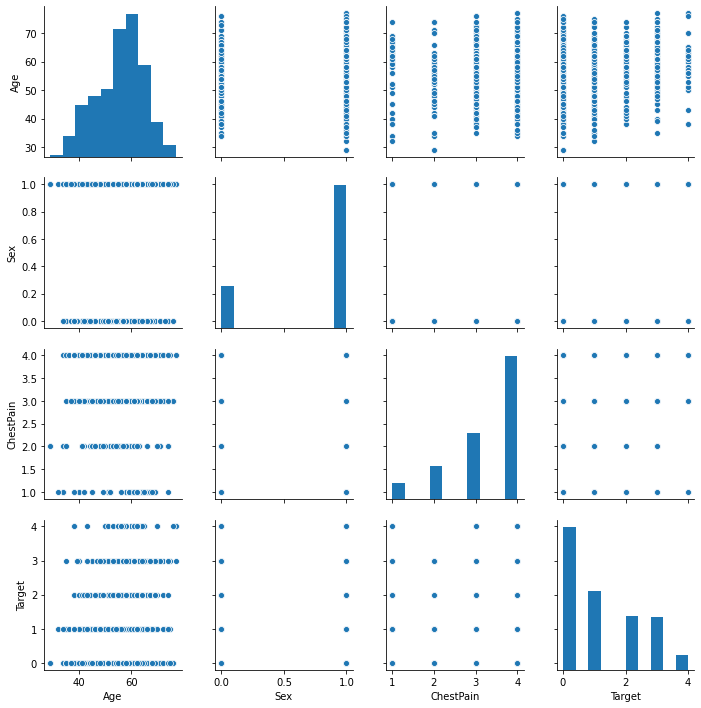

In [10]:
sns.pairplot(data)

## Conclusion:- As per the Pairplot we can definitely see that it is going to be non-linear classification, as the most of the points are overlapping, at this stage we can say that Bagging or Boosting algorithm may give us the better results over Logistic Regression.

## 2) Feature Engineering

## So there are values in some columns which are not clear, so converting them to NaN.

In [11]:
data['Rest_bp'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Cholestrol'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Fast_bld_sugar'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Rest_Ecg'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Max_Rt'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Ex_Angina'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['St_Depr'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Slope'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Colored_Vessels'].replace(to_replace= '?' ,value=np.nan,inplace=True)
data['Thalassemia'].replace(to_replace= '?' ,value=np.nan,inplace=True)

## Find out what percentage of values are missing

In [12]:
total_cells=np.product(data.shape)
missing_value_count=data.isnull().sum()
missing_cell=missing_value_count.sum()
print(missing_cell/total_cells*100)

7.558050130708903


## Checking for the Missing Values in the Respective Column.

In [13]:
data.isnull().sum()

Age                  0
Sex                  0
ChestPain            0
Rest_bp             58
Cholestrol           7
Fast_bld_sugar      82
Rest_Ecg             1
Max_Rt              54
Ex_Angina           54
St_Depr             62
Slope              119
Colored_Vessels    324
Thalassemia        222
Target               0
dtype: int64

## As per the Documentation of the dataset there is no information of the target variables having categorized as 2,3 or 4 so we are impute them as 0 to make our problem to simpler binary classification.

In [14]:
fil = (data.Target == 2) | (data.Target== 3) | (data.Target== 4)
data.loc[fil,'Target']=0
data.Target.value_counts()

0    715
1    214
Name: Target, dtype: int64

## Correlation

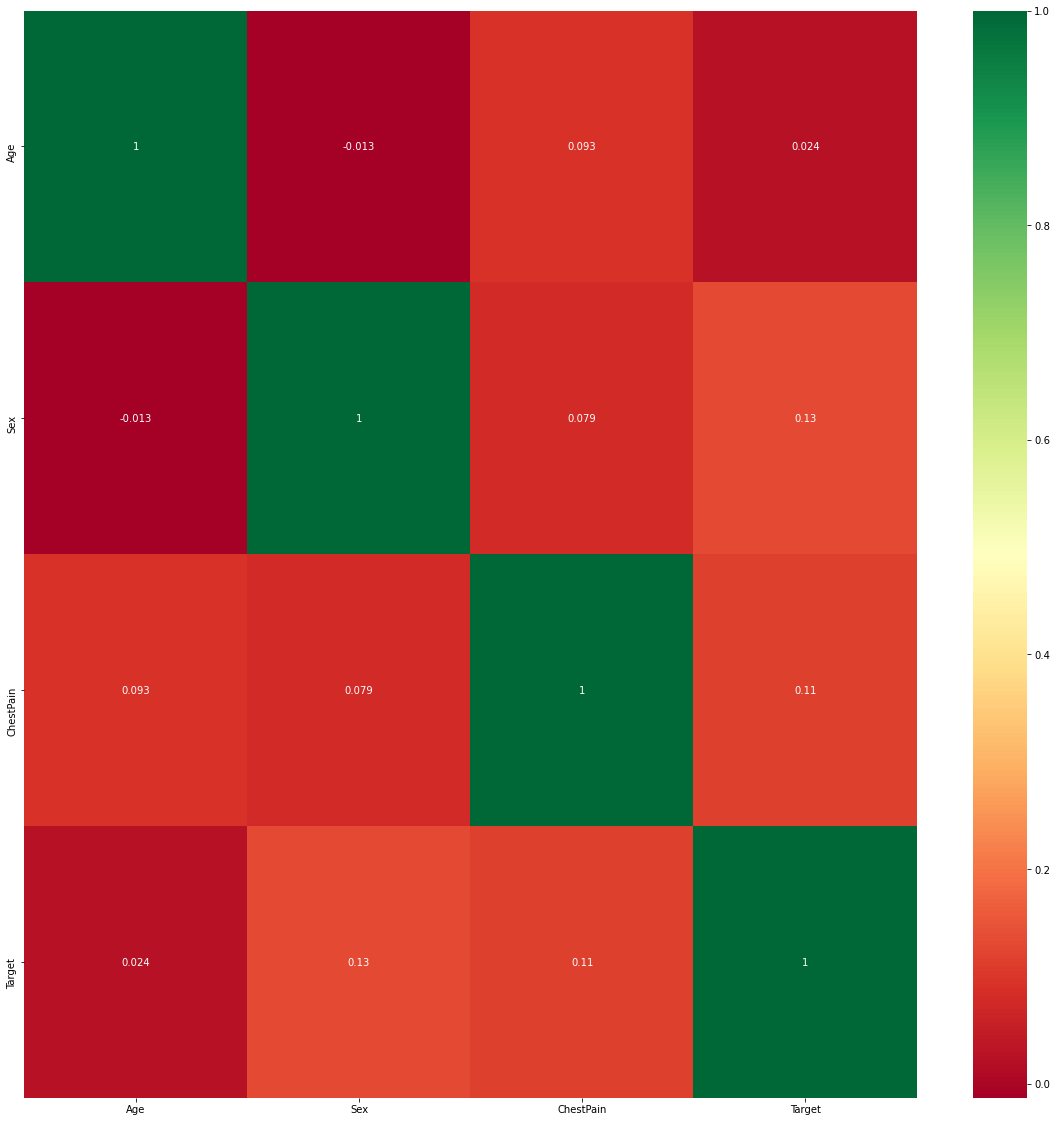

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Conclusion:- As there is only 4 numerical features(i.e.of datatype=int64) present in the dataset we can able to see the correlation amongst them only.

## To check whether our dataset is imbalanced or not.

In [16]:
(715/929)*100

76.96447793326158

In [17]:
(214/929)*100

23.03552206673843

## Checking our Target Variable.

Text(0, 0.5, 'COUNT')

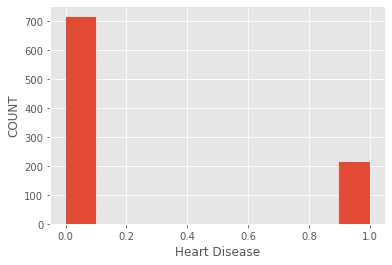

In [18]:
plt.style.use('ggplot')
data['Target'].hist()
plt.xlabel('Heart Disease')
plt.ylabel('COUNT')

## Conclusion:-Definitely we can see that our data is imbalanced.

In [19]:
Have_Heart_Disease = len(data[data['Target']==1])
Not_Have_Heart_Disease = len(data[data['Target']==0])
print("Having Heart Disease:",Have_Heart_Disease)
print("Not Having Heart Disease:", Not_Have_Heart_Disease)

Having Heart Disease: 214
Not Having Heart Disease: 715


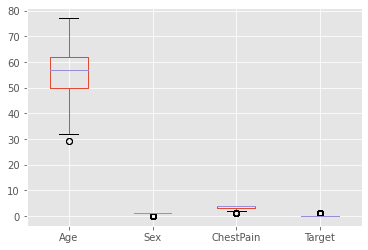

In [20]:
data.boxplot()

## As we have are having very small amount of the dataset, we need to cap the outliers instead of removing them, as if remove the outliers, we may lose useful information from the dataset,so the of  risk removing the outliers causes incorrect prediction of results. 

In [21]:
##data.isnull().sum()

In [22]:
##data_missing = data.isna()
##data_missing.head()

In [23]:
##data_missing.dtypes

In [24]:
##data_num_missing = data_missing.sum()
##data_num_missing

## Percentage of Missing values

In [25]:
data.isna().mean().round(4) * 100 

Age                 0.00
Sex                 0.00
ChestPain           0.00
Rest_bp             6.24
Cholestrol          0.75
Fast_bld_sugar      8.83
Rest_Ecg            0.11
Max_Rt              5.81
Ex_Angina           5.81
St_Depr             6.67
Slope              12.81
Colored_Vessels    34.88
Thalassemia        23.90
Target              0.00
dtype: float64

## Percentage of Non-Missing values for each column

In [26]:
(data.count() / len(data))*100

Age                100.000000
Sex                100.000000
ChestPain          100.000000
Rest_bp             93.756728
Cholestrol          99.246502
Fast_bld_sugar      91.173305
Rest_Ecg            99.892357
Max_Rt              94.187298
Ex_Angina           94.187298
St_Depr             93.326157
Slope               87.190527
Colored_Vessels     65.123789
Thalassemia         76.103337
Target             100.000000
dtype: float64

## Conclusion:- This states that we do not have less than 30% Non-Missing values so we did not drop any of the columns instead we will impute the values for the same.

## Missing value Imputation

In [27]:
df1 = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

## Cross Checking the Missing Values

In [28]:
df1.isnull().sum()

Age                0
Sex                0
ChestPain          0
Rest_bp            0
Cholestrol         0
Fast_bld_sugar     0
Rest_Ecg           0
Max_Rt             0
Ex_Angina          0
St_Depr            0
Slope              0
Colored_Vessels    0
Thalassemia        0
Target             0
dtype: int64

## Now there no Missing value present in our dataset.

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              929 non-null    int64 
 1   Sex              929 non-null    int64 
 2   ChestPain        929 non-null    int64 
 3   Rest_bp          929 non-null    object
 4   Cholestrol       929 non-null    object
 5   Fast_bld_sugar   929 non-null    object
 6   Rest_Ecg         929 non-null    object
 7   Max_Rt           929 non-null    object
 8   Ex_Angina        929 non-null    object
 9   St_Depr          929 non-null    object
 10  Slope            929 non-null    object
 11  Colored_Vessels  929 non-null    object
 12  Thalassemia      929 non-null    object
 13  Target           929 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.7+ KB


## After Scrutanizing our dataset we can able to find that there some features are categorical
## so we need to perform One hot encoding for those features.

In [30]:
df2=pd.get_dummies(df1,columns=['Sex','ChestPain','Fast_bld_sugar','Rest_Ecg','Ex_Angina','Slope','Thalassemia','Colored_Vessels'],drop_first=True)

In [31]:
df2.head()

,Age,Rest_bp,Cholestrol,Max_Rt,St_Depr,Target,Sex_1,ChestPain_2,ChestPain_3,ChestPain_4,...,Rest_Ecg_1,Rest_Ecg_2,Ex_Angina_1,Slope_2,Slope_3,Thalassemia_6,Thalassemia_7,Colored_Vessels_1,Colored_Vessels_2,Colored_Vessels_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,67,160,286,108,1.5,0,1,0,0,1,...,0,1,1,1,0,0,0,0,0,1
2,67,120,229,129,2.6,1,1,0,0,1,...,0,1,1,1,0,0,1,0,1,0
3,37,130,250,187,3.5,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,41,130,204,172,1.4,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                929 non-null    int64 
 1   Rest_bp            929 non-null    object
 2   Cholestrol         929 non-null    object
 3   Max_Rt             929 non-null    object
 4   St_Depr            929 non-null    object
 5   Target             929 non-null    int64 
 6   Sex_1              929 non-null    uint8 
 7   ChestPain_2        929 non-null    uint8 
 8   ChestPain_3        929 non-null    uint8 
 9   ChestPain_4        929 non-null    uint8 
 10  Fast_bld_sugar_1   929 non-null    uint8 
 11  Rest_Ecg_1         929 non-null    uint8 
 12  Rest_Ecg_2         929 non-null    uint8 
 13  Ex_Angina_1        929 non-null    uint8 
 14  Slope_2            929 non-null    uint8 
 15  Slope_3            929 non-null    uint8 
 16  Thalassemia_6      929 non-null    uint8 
 1

## Based on the data points present in the column we need to change the data type of some columns to appropriate numerical data type.

In [33]:
convert_dict = {'Rest_bp': int, 
                'Cholestrol': int,
                'Max_Rt':int,
                'St_Depr':float
               } 

In [34]:
df2 = df2.astype(convert_dict) 
print(df2.dtypes)

Age                    int64
Rest_bp                int32
Cholestrol             int32
Max_Rt                 int32
St_Depr              float64
Target                 int64
Sex_1                  uint8
ChestPain_2            uint8
ChestPain_3            uint8
ChestPain_4            uint8
Fast_bld_sugar_1       uint8
Rest_Ecg_1             uint8
Rest_Ecg_2             uint8
Ex_Angina_1            uint8
Slope_2                uint8
Slope_3                uint8
Thalassemia_6          uint8
Thalassemia_7          uint8
Colored_Vessels_1      uint8
Colored_Vessels_2      uint8
Colored_Vessels_3      uint8
dtype: object


## As the columns are present in the different units, we need to scaled down those features in order to achieve the better accuracy.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
columns_to_scale=['Age','Rest_bp','Cholestrol','Max_Rt','St_Depr']
df2[columns_to_scale]=standardScaler.fit_transform(df2[columns_to_scale])

In [36]:
df2.head()

,Age,Rest_bp,Cholestrol,Max_Rt,St_Depr,Target,Sex_1,ChestPain_2,ChestPain_3,ChestPain_4,...,Rest_Ecg_1,Rest_Ecg_2,Ex_Angina_1,Slope_2,Slope_3,Thalassemia_6,Thalassemia_7,Colored_Vessels_1,Colored_Vessels_2,Colored_Vessels_3
0,0.821755,0.746120,0.325286,0.385277,1.169901,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,1.266698,1.550607,0.818650,-1.226466,0.468715,0,1,0,0,1,...,0,1,1,1,0,0,0,0,0,1
2,1.266698,-0.594691,0.288051,-0.420595,1.432846,1,1,0,0,1,...,0,1,1,1,0,0,1,0,1,0
3,-2.070373,-0.058366,0.483535,1.805145,2.221680,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.625431,-0.058366,0.055332,1.229523,0.381067,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## Defining the Feature as Independent and Dependent

In [37]:
y=df2['Target']
X=df2.drop(['Target'],axis=1)

## Now As our dataset is imbalanced, we need to perform oversampling to make that classes balanced, otherwise our model gets biased towards higher number category records and will give us incorrect results.

## Oversampling

In [38]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [39]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [40]:
X_res.shape,y_res.shape

((1424, 20), (1424,))

In [41]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 715, 1: 214})
Resampled dataset shape Counter({0: 712, 1: 712})


In [42]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [43]:
os =  RandomOverSampler(sampling_strategy=0.5)

In [44]:
X_train_res, y_train_res = os.fit_sample(X, y)

In [45]:
X_train_res.shape,y_train_res.shape

((1072, 20), (1072,))

In [46]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 715, 1: 214})
Resampled dataset shape Counter({0: 715, 1: 357})


In [47]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(sampling_strategy=1)

X_train_res1, y_train_res1 = os_us.fit_sample(X, y)

In [48]:
X_train_res1.shape,y_train_res1.shape

((1420, 20), (1420,))

In [49]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 715, 1: 214})
Resampled dataset shape Counter({0: 710, 1: 710})


## Train Test Split on our final Balanced Dataset

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_res1,y_train_res1,test_size = 0.3,random_state = 10)

In [51]:
X_train.shape

(994, 20)

In [52]:
X_test.shape

(426, 20)

## Fitting the Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=10)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction on Test DataSet

In [54]:
y_pred = logmodel.predict(X_test)

## Summary on Performance Metrices for Logistic Regression

In [55]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Model1 = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
Model1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.683099,0.673469,0.75,0.709677,0.680825


## ROC-AUC Curve

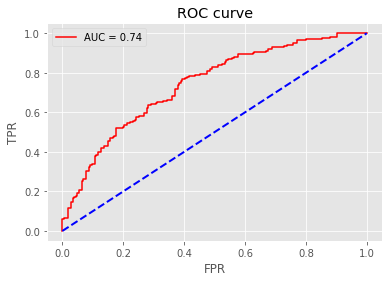

In [56]:
plt.style.use('ggplot')
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = logmodel.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm1)

Confusion Matrix:
[[126  80]
 [ 55 165]]


## True Positives,True Negatives,False Positive,False Negative

In [58]:
tn1, fp1, fn1, tp1 = cm1.ravel()
(tn1, fp1, fn1, tp1)

(126, 80, 55, 165)

## Precision-Recall Curve for Logistic Regression

(0.0, 1.0)

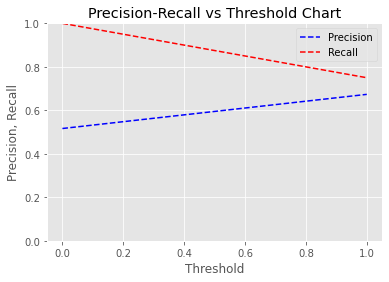

In [59]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred) 

#pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

## K-Nearest Neighbour classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

## Finding the Best K value that gives us less error rate possible.

In [61]:
error_rate = []
for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

## Plotting of Error Rate vs K-Value

Text(0, 0.5, 'Error Rate')

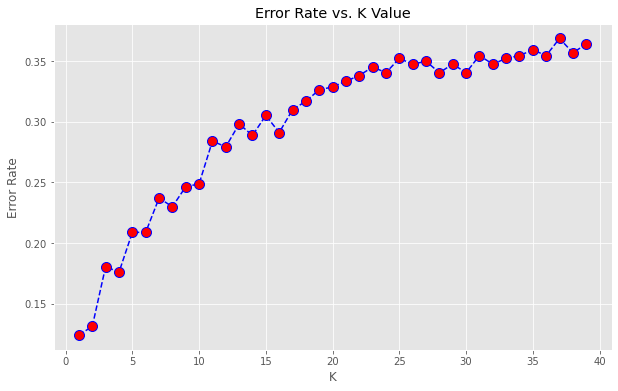

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Plotting Accuracy Rate VS K Value

In [63]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

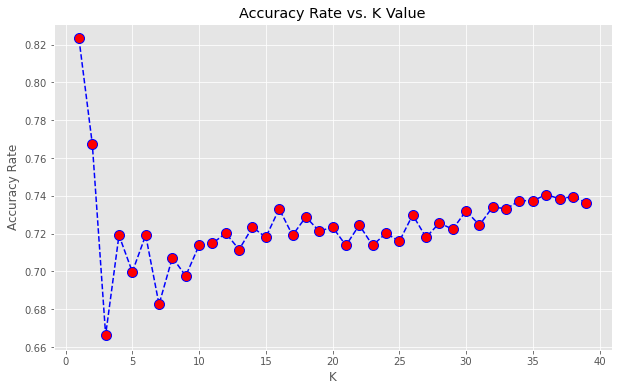

In [64]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

## Conclusion:- If we Set any value of K>15, that will give us the least Error Rate.

## Tuning the K-Nearest Neighbour

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

## Prediction on test data

In [66]:
y_pred = knn.predict(X_test)

## Summary of Performance Metrics

In [67]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Model2 = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
Model2=Model1.append(Model2,ignore_index=True)
Model2

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.683099,0.673469,0.750000,0.709677,0.680825
1,K-Nearest Neighbour,0.708920,0.663265,0.886364,0.758755,0.702891


## ROC-AUC Curve

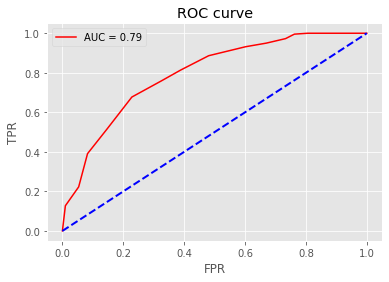

In [68]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Confusion Matrix for KNN

In [69]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm2)

Confusion Matrix:
[[107  99]
 [ 25 195]]


## True Positives,True Negatives, False Positives and False Negatives

In [70]:
tn2, fp2, fn2, tp2 = cm2.ravel()
(tn2, fp2, fn2, tp2)

(107, 99, 25, 195)

## Precision Recall Curve

(0.0, 1.0)

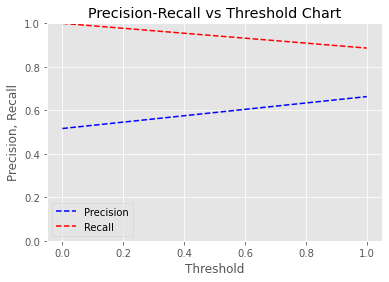

In [71]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred) 

#pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

## Support Vector Classifier with Radial Basis Function(Rbf) Kernel.

In [72]:
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 10,probability=True)
scv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

## Prediction on Test Data Set

In [73]:
y_pred = scv.predict(X_test)

## Confusion matrix for SVC

In [74]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm3)

Confusion Matrix:
[[156  50]
 [ 29 191]]


## True Positives,True Negatives,False Positives,False Negatives

In [75]:
tn3, fp3, fn3, tp3 = cm3.ravel()
(tn3, fp3, fn3, tp3)

(156, 50, 29, 191)

## Summary on Performance Metrics

In [76]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Model3 = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
Model3=Model2.append(Model3,ignore_index=True)
Model3

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.683099,0.673469,0.750000,0.709677,0.680825
1,K-Nearest Neighbour,0.708920,0.663265,0.886364,0.758755,0.702891
2,Support Vector Machine,0.814554,0.792531,0.868182,0.828633,0.812732


## Precision-Recall Curve

(0.0, 1.0)

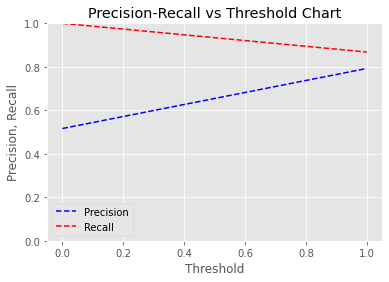

In [77]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred) 

#pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

## ROC-AUC Curve

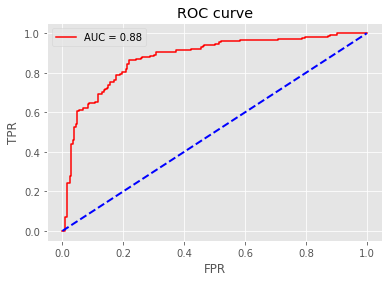

In [78]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = scv.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'gini',random_state = 10)
dct.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

## Prediction on test data set

In [80]:
y_pred = dct.predict(X_test)

## Confusion Matrix for Decision Tree classifier

In [81]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm4)

Confusion Matrix:
[[168  38]
 [ 28 192]]


## True Positives,True Negatives,False Positives,False Negatives

In [82]:
tn4, fp4, fn4, tp4 = cm4.ravel()
(tn4, fp4, fn4, tp4)

(168, 38, 28, 192)

## Summary of Performance Metrics

In [83]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Model4 = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
Model4=Model3.append(Model4,ignore_index=True)
Model4

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.683099,0.673469,0.750000,0.709677,0.680825
1,K-Nearest Neighbour,0.708920,0.663265,0.886364,0.758755,0.702891
2,Support Vector Machine,0.814554,0.792531,0.868182,0.828633,0.812732
3,Decision Tree Classifier,0.845070,0.834783,0.872727,0.853333,0.844131


## ROC-AUC Curve

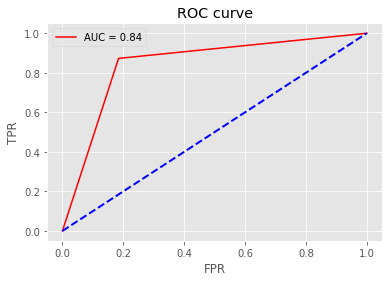

In [84]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = dct.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Precision-Recall Curve

(0.0, 1.0)

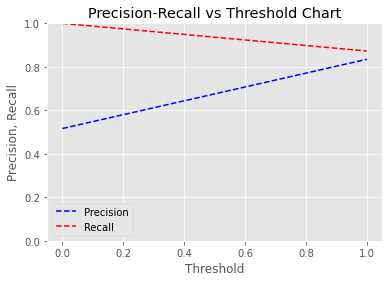

In [85]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred) 

#pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

## Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'gini',random_state = 10)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

## Prediction on test data set

In [87]:
y_pred = rfc.predict(X_test)

## Confusion Matrix for Random Forest Classifier

In [88]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm5)

Confusion Matrix:
[[184  22]
 [ 28 192]]


## True Positives,True Negatives,False Positives,False Negatives

In [89]:
tn5, fp5, fn5, tp5 = cm5.ravel()
(tn5, fp5, fn5, tp5)

(184, 22, 28, 192)

## Summary of Performance Metrics

In [90]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Model5 = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

Model5=Model4.append(Model5,ignore_index=True)
Model5

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.683099,0.673469,0.750000,0.709677,0.680825
1,K-Nearest Neighbour,0.708920,0.663265,0.886364,0.758755,0.702891
2,Support Vector Machine,0.814554,0.792531,0.868182,0.828633,0.812732
3,Decision Tree Classifier,0.845070,0.834783,0.872727,0.853333,0.844131
4,Random tree Classifier,0.882629,0.897196,0.872727,0.884793,0.882966


## ROC-AUC Curve

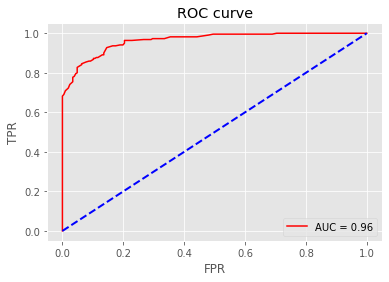

In [91]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = rfc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Precision-Recall Curve

(0.0, 1.0)

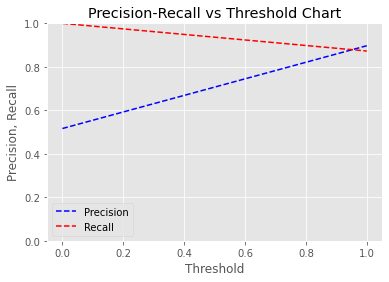

In [92]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred) 

#pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

## Tuning The Random Forest Classifier Model

In [93]:
## Hyper Parameter Optimization

params={
 "n_estimators"    : [200, 400,500,600,700,800] ,
 "max_features"    : ['auto','sqrt','log2'],
 "max_depth"       : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_split" : [ 2, 5, 10],
 "min_samples_leaf" : [1, 2, 4],
 "bootstrap"      :[True, False],
 "oob_score"      :[True,False]
}

In [94]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Timer function to check how much time will be required.

In [95]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## Object of Random Forest Classifier

In [96]:
randomforestclassifier_Tuned=RandomForestClassifier()

## Randomized Search CV with Given parameters

In [97]:
random_search=RandomizedSearchCV(randomforestclassifier_Tuned,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [98]:
X=X_train_res1
Y=y_train_res1

## Processing of Randomized Search CV

In [99]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    9.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.5s finished



 Time taken: 0 hours 0 minutes and 11.86 seconds.


In [100]:
X.head()

,Age,Rest_bp,Cholestrol,Max_Rt,St_Depr,Sex_1,ChestPain_2,ChestPain_3,ChestPain_4,Fast_bld_sugar_1,Rest_Ecg_1,Rest_Ecg_2,Ex_Angina_1,Slope_2,Slope_3,Thalassemia_6,Thalassemia_7,Colored_Vessels_1,Colored_Vessels_2,Colored_Vessels_3
0,0.821755,0.746120,0.325286,0.385277,1.169901,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,1.266698,1.550607,0.818650,-1.226466,0.468715,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1
2,1.266698,-0.594691,0.288051,-0.420595,1.432846,1,0,0,1,0,0,1,1,1,0,0,1,0,1,0
3,-2.070373,-0.058366,0.483535,1.805145,2.221680,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.625431,-0.058366,0.055332,1.229523,0.381067,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


## Best estimators for algorithms

In [101]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Best Parameters based on the parameters we have provided.

In [102]:
random_search.best_params_

{'oob_score': False,
 'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 12,
 'bootstrap': True}

## trying to fit the Model once again.

In [103]:
classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Checking the accuracy by using cross validation

In [104]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

## Accuracy on each fold

In [105]:
score

array([0.88028169, 0.90140845, 0.6971831 , 0.93661972, 0.95774648,
       0.97183099, 0.92957746, 0.54929577, 0.8028169 , 0.83802817])

## Mean Accuracy

In [106]:
score.mean()

0.8464788732394366

## Best parameters

In [107]:
best_parameters = random_search.best_params_
best_parameters

{'oob_score': False,
 'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 12,
 'bootstrap': True}

## Prediction on Tuned Model

In [108]:
y_pred_randomforest =random_search.predict(X_test)

## Performance metric on Tuned Random Forest Classifier Model

In [109]:
roc=roc_auc_score(y_test, y_pred_randomforest)
acc = accuracy_score(y_test, y_pred_randomforest)
prec = precision_score(y_test, y_pred_randomforest)
rec = recall_score(y_test, y_pred_randomforest)
f1 = f1_score(y_test, y_pred_randomforest)
model6_Tuned =  pd.DataFrame([['Random Forest Classifier MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

## Tuned Random Forest Classifier Model Summary

In [110]:
model6_Tuned

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Classifier MODEL TUNED,0.967136,0.943966,0.995455,0.969027,0.966174


## Generating Pickle File

In [111]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classification_model.pkl', 'wb')

# dump information to that file
pickle.dump(model6_Tuned, file)

Conclusion:-Random Forest Gives us Best Accuracy amongst all other models, as it is using Row Sampling with Replacement as well as Feature Sampling Replacement technique to process different subset of the sample data and not based on one decision tree but based on the aggregation of the decision trees(Voting Classifer) gives us the correct prediction which results into Low variance as well.